## RDD COVID Hospitalizations in Quebec

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

In [2]:
# https://www.donneesquebec.ca/recherche/dataset/covid-19-portrait-quotidien-des-cas-confirmes/resource/d2cf4211-5400-46a3-9186-a81e6cd41de9
data = pd.read_csv('COVID19_Qc_RapportINSPQ_HistoVigie.csv')

# Drop "inconnu"
data = data.drop(data.index[0])

# convert the date column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Create a column in the data that stores the date as a numeric value for regression
data['Date_Num'] = mdates.date2num(data['Date'])

# These are the three columns that we need in our dataframe
df = data[['Date','Date_Num','Nb_Nvx_Cas']]

df = df.dropna()

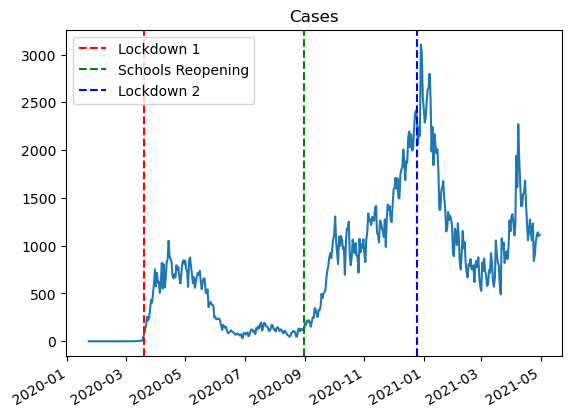

In [3]:
# This plot shows where the three cutoff dates are in the entirety of the dataset

# I selected just the period that includes the three cutoff dates from the dataset
covid_period = df[df['Date'] <= '2021-04-30']

X = covid_period['Date']
y = covid_period['Nb_Nvx_Cas']

fig, ax = plt.subplots()
ax.plot(X, y)

lockdown_1_date = pd.to_datetime('2020-03-20')
schools_reopening_date = pd.to_datetime('2020-08-31')
lockdown_2_date = pd.to_datetime('2020-12-25')

ax.axvline(x=lockdown_1_date, color='red', linestyle='--', label='Lockdown 1')
ax.axvline(x=schools_reopening_date, color='green', linestyle='--', label='Schools Reopening')
ax.axvline(x=lockdown_2_date, color='blue', linestyle='--', label='Lockdown 2')

fig.autofmt_xdate()
plt.title('Cases')
plt.legend()
plt.show()

In [4]:
# The 20/3/2020 lockdown 
# The reopening of schools on 31/8/2020
# The 25/12/2020 lockdown

## Lockdown 1 - 20/3/2020

In [20]:
# 52 days bef/aft + 5 days gap

# Define the periods before lockdown 1 and after lockdown 1
pre_lockdown1 = df[(df['Date'] >= '2020-01-23') & (df['Date'] <= '2020-03-15')]
# Here is where we can play with the window time
post_lockdown1 = df[(df['Date'] >= '2020-03-25') & (df['Date'] <= '2020-05-16')]

In [21]:
# Fit a linear regression for the pre-lockdown 1 period
pre_lockdown1_X = sm.add_constant(pre_lockdown1['Date_Num'])
pre_lockdown1_y = pre_lockdown1['Nb_Nvx_Cas']
pre_lockdown1_lm = sm.OLS(pre_lockdown1_y, pre_lockdown1_X).fit()
pre_lockdown1_pred = pre_lockdown1_lm.predict(pre_lockdown1_X)

In [22]:
# Fit a linear regression for the post-lockdown 1 period
post_lockdown1_X = sm.add_constant(post_lockdown1['Date_Num'])
post_lockdown1_y = post_lockdown1['Nb_Nvx_Cas']
post_lockdown1_lm = sm.OLS(post_lockdown1_y, post_lockdown1_X).fit()
post_lockdown1_pred = post_lockdown1_lm.predict(post_lockdown1_X)
# post_lockdown1_lm.summary()

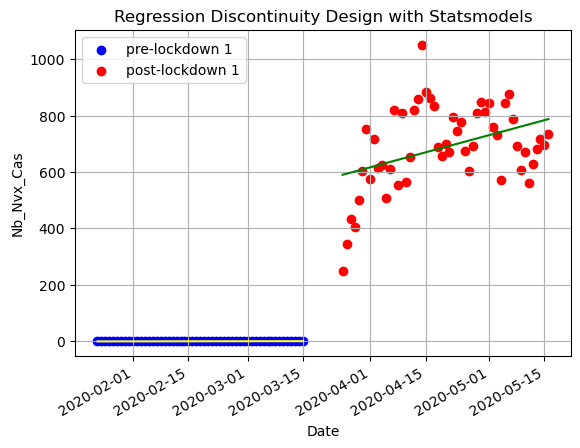

In [23]:
# Plot the pre- and post-lockdown periods
fig, ax = plt.subplots()
ax.scatter(pre_lockdown1['Date'], pre_lockdown1['Nb_Nvx_Cas'], color='blue', label='pre-lockdown 1')
ax.scatter(post_lockdown1['Date'], post_lockdown1['Nb_Nvx_Cas'], color='red', label='post-lockdown 1')
ax.plot(pre_lockdown1['Date'],pre_lockdown1_pred,color='yellow')
ax.plot(post_lockdown1['Date'],post_lockdown1_pred,color='green')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Nb_Nvx_Cas')
plt.title('Regression Discontinuity Design with Statsmodels')
plt.grid(True)
fig.autofmt_xdate()
plt.show()

In [24]:
from scipy.stats import ttest_ind
ttest_ind(pre_lockdown1['Nb_Nvx_Cas'], post_lockdown1['Nb_Nvx_Cas'])

TtestResult(statistic=-33.962028353814176, pvalue=4.20265044279065e-58, df=104.0)

## School re-opening - 31/8/2020

In [25]:
# 52 days bef/aft + 5 days gap


# Define the periods before lockdown 1 and after lockdown 1
pre_school = df[(df['Date'] >= '2020-07-05') & (df['Date'] <= '2020-08-26')]
# Here is where we can play with the window time
post_school = df[(df['Date'] >= '2020-09-05') & (df['Date'] <= '2020-10-27')]

In [26]:
# Fit a linear regression for the pre-lockdown 1 period
pre_school_X = sm.add_constant(pre_school['Date_Num'])
pre_school_y = pre_school['Nb_Nvx_Cas']
pre_school_lm = sm.OLS(pre_school_y, pre_school_X).fit()
pre_school_pred = pre_school_lm.predict(pre_school_X)

In [27]:
# Fit a linear regression for the post-lockdown 1 period
post_school_X = sm.add_constant(post_school['Date_Num'])
post_school_y = post_school['Nb_Nvx_Cas']
post_school_lm = sm.OLS(post_school_y, post_school_X).fit()
post_school_pred = post_school_lm.predict(post_school_X)
# post_lockdown1_lm.summary()

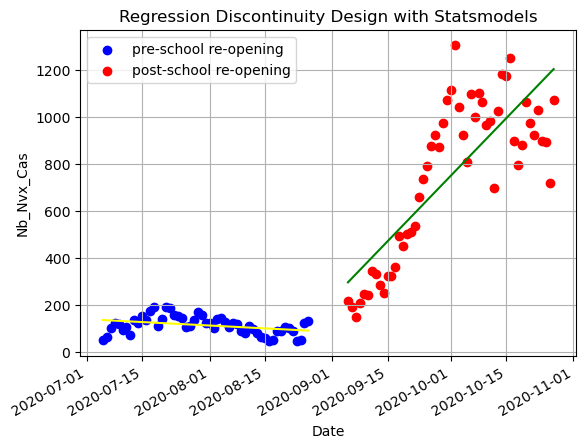

In [28]:
# Plot the pre- and post-lockdown periods
fig, ax = plt.subplots()
ax.scatter(pre_school['Date'], pre_school['Nb_Nvx_Cas'], color='blue', label='pre-school re-opening')
ax.scatter(post_school['Date'], post_school['Nb_Nvx_Cas'], color='red', label='post-school re-opening')
ax.plot(pre_school['Date'],pre_school_pred,color='yellow')
ax.plot(post_school['Date'],post_school_pred,color='green')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Nb_Nvx_Cas')
plt.title('Regression Discontinuity Design with Statsmodels')
plt.grid(True)
fig.autofmt_xdate()
plt.show()

In [29]:
from scipy.stats import ttest_ind
ttest_ind(pre_school['Nb_Nvx_Cas'], post_school['Nb_Nvx_Cas'])

TtestResult(statistic=-13.748049620096438, pvalue=3.9200004102935347e-25, df=104.0)

## Lockdown 2

In [31]:
# 52 days bef/aft + 5 days gap



# Define the periods before lockdown 1 and after lockdown 1
pre_lockdown2 = df[(df['Date'] >= '2020-10-29') & (df['Date'] <= '2020-12-20')]
# Here is where we can play with the window time
post_lockdown2 = df[(df['Date'] >= '2020-12-30') & (df['Date'] <= '2021-02-20')]


In [32]:
# Fit a linear regression for the pre-lockdown 1 period
pre_lockdown2_X = sm.add_constant(pre_lockdown2['Date_Num'])
pre_lockdown2_y = pre_lockdown2['Nb_Nvx_Cas']
pre_lockdown2_lm = sm.OLS(pre_lockdown2_y, pre_lockdown2_X).fit()
pre_lockdown2_pred = pre_lockdown2_lm.predict(pre_lockdown2_X)

In [33]:
# Fit a linear regression for the post-lockdown 1 period
post_lockdown2_X = sm.add_constant(post_lockdown2['Date_Num'])
post_lockdown2_y = post_lockdown2['Nb_Nvx_Cas']
post_lockdown2_lm = sm.OLS(post_lockdown2_y, post_lockdown2_X).fit()
post_lockdown2_pred = post_lockdown2_lm.predict(post_lockdown2_X)
# post_lockdown1_lm.summary()

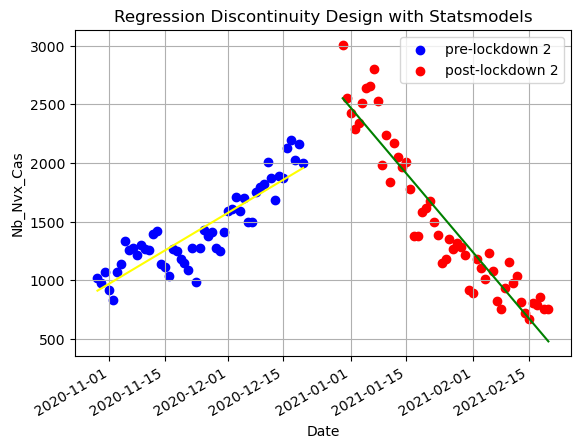

In [34]:
# Plot the pre- and post-lockdown periods
fig, ax = plt.subplots()
ax.scatter(pre_lockdown2['Date'], pre_lockdown2['Nb_Nvx_Cas'], color='blue', label='pre-lockdown 2')
ax.scatter(post_lockdown2['Date'], post_lockdown2['Nb_Nvx_Cas'], color='red', label='post-lockdown 2')
ax.plot(pre_lockdown2['Date'],pre_lockdown2_pred,color='yellow')
ax.plot(post_lockdown2['Date'],post_lockdown2_pred,color='green')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Nb_Nvx_Cas')
plt.title('Regression Discontinuity Design with Statsmodels')
plt.grid(True)
fig.autofmt_xdate()
plt.show()

In [35]:
from scipy.stats import ttest_ind
ttest_ind(pre_lockdown2['Nb_Nvx_Cas'], post_lockdown2['Nb_Nvx_Cas'])

TtestResult(statistic=-0.7908392927565426, pvalue=0.4308375521285558, df=104.0)